<a href="https://colab.research.google.com/github/Prathambhoir55/Synapse-Learning-period/blob/week3/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [1019]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [1020]:
# import numpy, pandas, matplotlib, seaborn
# add code here

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Read housing_data.csv using pandas and call head() to show first few records.**

In [1021]:
# add code here
housing_data_path = "/content/gdrive/My Drive/synapse_w2/housing_data.csv"

df = pd.read_csv(housing_data_path)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [1022]:
# add code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [1023]:
# add code here
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [1024]:
# add code here

for column in df.columns:
  print(column)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

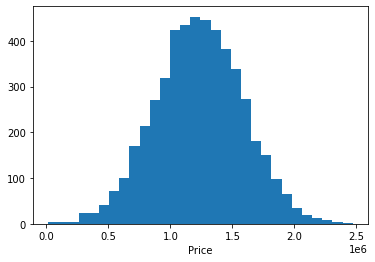

In [1025]:
# add code here

x = df['Price']
plt.xlabel("Price")
plt.hist(x, bins= 30)
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [1026]:
# add code here

df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [1027]:
# add code here
columns = list(df.columns)
X = df.drop(columns=['Address', 'Price'])
y = df[['Price']]

In [1028]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape)
y.shape

(5000, 5)


(5000, 1)

In [1029]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [1030]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [1031]:
# print a few record of y
# add code here
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [1032]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [1033]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [1034]:
# add code here
print('X_train\nSize=',X_train.size,' Shape=',X_train.shape)
print('\nX_test\nSize=',X_test.size,' Shape=',X_test.shape)
print('\ny_train\nSize=',y_train.size,' Shape=',y_train.shape)
print('\ny_test\nSize=',y_test.size,' Shape=',y_test.shape)


X_train
Size= 17500  Shape= (3500, 5)

X_test
Size= 7500  Shape= (1500, 5)

y_train
Size= 3500  Shape= (3500, 1)

y_test
Size= 1500  Shape= (1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [1035]:
# add code for imports here
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here

lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [1036]:
# add code here
#lm.fit(X_train, y_train)

**K-Fold**

In [1037]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from statistics import mean


scores= []
kf = KFold(n_splits=9)
for train_index, test_index in kf.split(X_train):
  X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
  lm.fit(X_train_kf, y_train_kf)
  pred = lm.predict(X_test_kf)
  scores.append(round(r2_score(pred, y_test_kf), 3))


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [1038]:
# add code here
predictions = lm.predict(X_test)
print('Type =', type(predictions), 'Size= ', predictions.size)

Type = <class 'numpy.ndarray'> Size=  1500


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

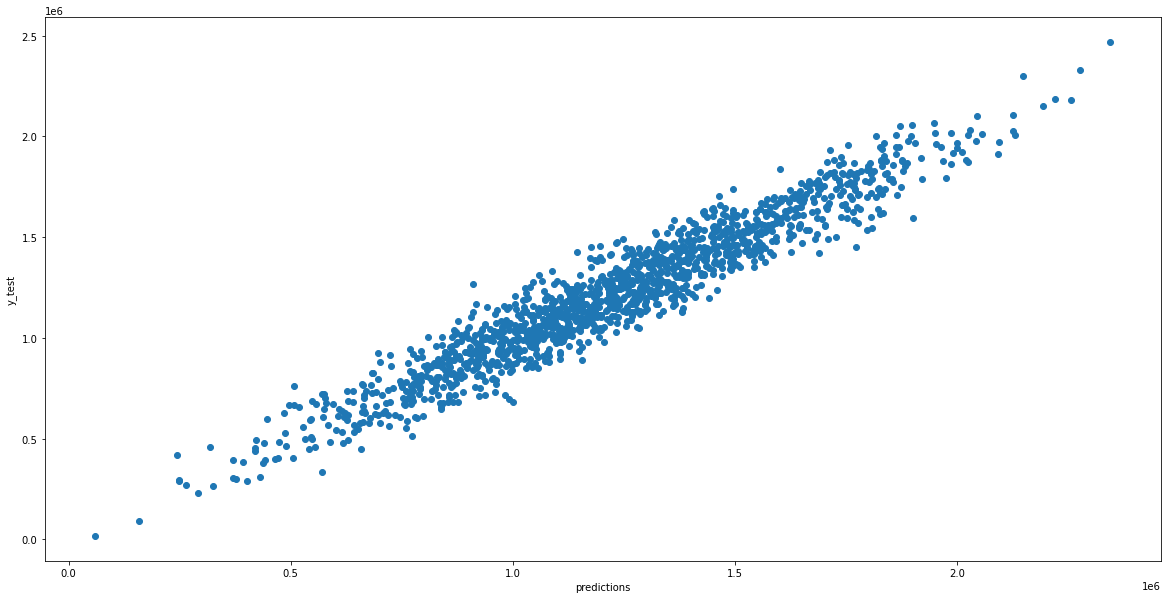

In [1039]:
# add code here
plt.figure(figsize= (20,10))
plt.xlabel("predictions")
plt.ylabel("y_test")
plt.scatter(predictions, y_test)
plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [1040]:
# add code here
print('Test accuracy=', round(r2_score(predictions, y_test), 3))
print('Train accuracy=', round(mean(scores), 3))


Test accuracy= 0.916
Train accuracy= 0.909


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [1041]:
# import numpy, pandas, matplotlib, seaborn
# add code here

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [1042]:
# add code here
classified_data_path = "/content/gdrive/My Drive/synapse_w2/classified_data.txt"

df = pd.read_csv(classified_data_path, index_col= 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [1043]:
# add code here
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [1044]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [1045]:
# add code here
columns = list(df.columns)

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

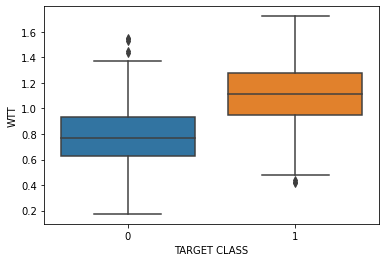

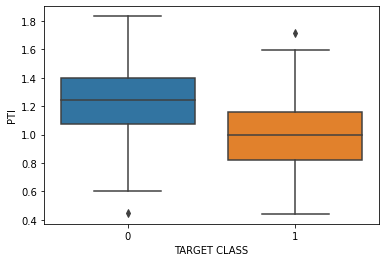

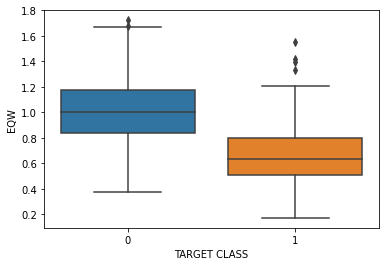

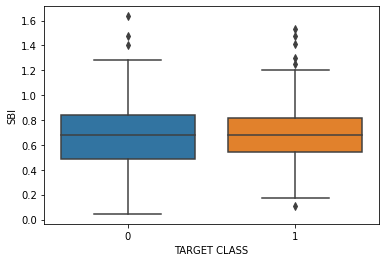

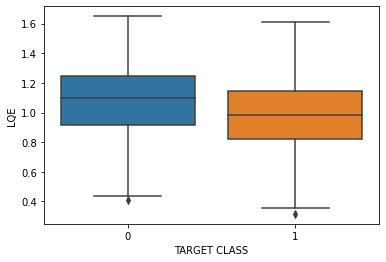

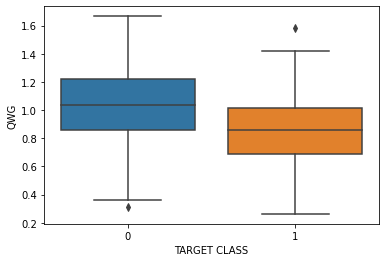

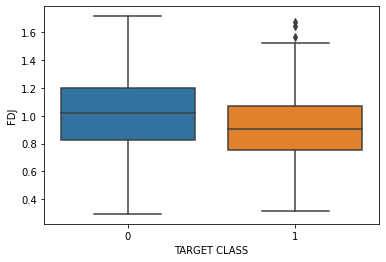

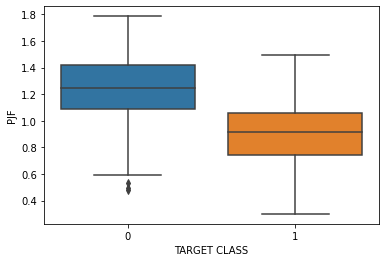

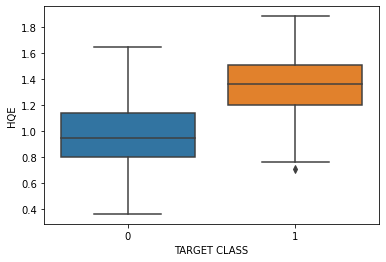

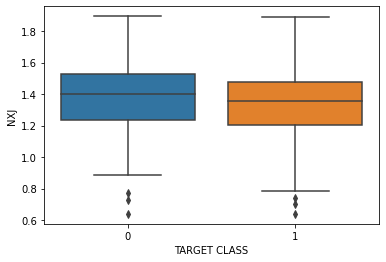

In [1046]:
# add code here
features = columns[:-1]
for feat in features:
  sns.boxplot(data= df, x= 'TARGET CLASS', y= feat)
  plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [1047]:
# add code here

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [1048]:
# add code here
df_features = df.drop(columns=['TARGET CLASS'])
scaler.fit(df_features)
scaled_data = scaler.transform(df_features)

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [1049]:
# add code here
cols= columns[:-1]
df_feat = pd.DataFrame(scaled_data, columns= cols)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [1050]:
# add code here

X = df_feat
y = df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [1051]:
# add code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [1052]:
# add code here

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [1053]:
# add code here
pred = neigh.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [1054]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [1055]:
# add code here
total = y_test.size
y_test_np = y_test.to_numpy()
accuracy = round(np.mean(y_test_np == pred) , 3)
accuracy



0.937

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [1056]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here

# accuracy = []
# for i in range(1,61):
#   neigh = KNeighborsClassifier(n_neighbors=i)
#   neigh.fit(X_train, y_train)
#   pred = neigh.predict(X_test)
#   accuracy.append(round(np.mean(y_test_np == pred) , 3))

**K-Fold**

In [1057]:
from sklearn.model_selection import KFold
from statistics import mean


accuracy_knn = []
kf = KFold(n_splits=9)
for j in range(1,61):
  scores= []
  knn = KNeighborsClassifier(n_neighbors=j, weights='distance')
  for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(X_train_kf, y_train_kf)
    knn_score = knn.score(X_test_kf, y_test_kf)
    scores.append(knn_score)
  accuracy_knn.append(mean(scores))
optimum_k_acc = max(accuracy_knn)
accuracy_knn.index(optimum_k_acc)


31

In [1058]:
kf = KFold(n_splits=9)
scores= []
knn = KNeighborsClassifier(n_neighbors=31, weights='distance')
for train_index, test_index in kf.split(X_train):
  X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
  knn.fit(X_train_kf, y_train_kf)
  knn_score = knn.score(X_test_kf, y_test_kf)
  scores.append(knn_score)
print(mean(scores))

0.92999592999593


**Plot a graph of K value vs Accuracy**

In [1059]:
# add code here
# k_values = list(range(1,61))
# plt.plot(k_values, accuracy)

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [1060]:
# add code here 
# optimum_accuracy = max(accuracy) #highest accuracy
# k_optimum = accuracy.index(optimum_accuracy) +1
# print('Optimum K=', k_optimum, '\nOptimum accuracy=', optimum_accuracy)

**Test accuracy and Train accuracy**

In [1061]:
knn.score(X_test, y_test)
print('Test accuracy=', round(knn.score(X_test, y_test), 3))
print('Train accuracy=', round(mean(scores), 3))

Test accuracy= 0.947
Train accuracy= 0.93


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [1062]:
#write code here
titanic_data_path = "/content/gdrive/My Drive/synapse_w2/titanic_data.csv"

df = pd.read_csv(titanic_data_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [1063]:
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  #remove this line after writing the code

  #Creating Title feature
  import re
  titles = []
  for name in df['Name']:
    title = re.search('(\w+)\.', name).group(1)
    titles.append(title)
  df['Title'] = titles

  #Removing unnecessary columns
  train_df = df.drop(columns=['PassengerId', 'Ticket', 'Name'])
  
  #Nan Analysis
  nan_list= []
  for col in train_df.columns:
    nan_count= train_df[col].isnull().sum()
    nan_percent = nan_count *100/len(train_df[col])
    nan_list.append([col, nan_percent])
  nan_df = pd.DataFrame(nan_list, columns=['Column','NaN percent'])
  discard = nan_df.loc[nan_df['NaN percent'] >50 ]
  train_df.drop(columns=discard['Column'], inplace= True)
  train_df['Embarked'] = train_df['Embarked'].replace(np.nan, train_df['Embarked'].mode()[0])
  train_df['Age'] = train_df['Age'].replace(np.nan, train_df['Age'].mean())

  #Adding features
  family_members= []
  for i in range(0, len(train_df)):
    sum = train_df['SibSp'][i] +train_df['Parch'][i]
    family_members.append(sum)
  train_df['Family_members']= family_members
  train_df.drop(columns=['SibSp', 'Parch'], inplace= True)

  #standardization and normalization
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  train_df[['Age']] = MinMaxScaler().fit_transform(train_df[['Age']])
  train_df[['Fare']] = StandardScaler().fit_transform(train_df[['Family_members']])
  train_df[['Family_members']] = MinMaxScaler().fit_transform(train_df[['Family_members']])

  #One hot encoding
  train_df= pd.get_dummies(train_df, columns= ['Pclass','Sex','Title','Embarked'])
  return train_df

df = titanic_preprocessing_pipeline(df)
df

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.059160,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.059160,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,-0.560975,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.059160,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,-0.560975,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,-0.560975,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,-0.560975,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1.299429,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,-0.560975,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [1064]:
#write code here
y = df['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [1065]:
#write code here
X = df.drop(columns=['Survived'])

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [1066]:
#write code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [1067]:
#write code here
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# dt_model = DecisionTreeClassifier(random_state = 42)
# dt_model.fit(X_train, y_train)
# print(dt_model.score(X_train, y_train))
# dt_model.score(X_test, y_test)

In [1068]:
# train_accuracy = []
# test_accuracy = []
# for i in range(1,41):
#   dt_model = DecisionTreeClassifier(random_state = 42, max_depth= i)
#   dt_model.fit(X_train, y_train)
#   train_accuracy.append(dt_model.score(X_train, y_train))
#   test_accuracy.append(dt_model.score(X_test, y_test))

# frame = pd.DataFrame({'max_depth': range(1,41), 'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy})
# plt.figure(figsize=(10,5))
# plt.plot(frame['max_depth'], frame['Train accuracy'], marker='o')
# plt.plot(frame['max_depth'], frame['Test accuracy'], marker='o')


In [1069]:
# dt_model = DecisionTreeClassifier(random_state = 42, max_depth= 3)
# dt_model.fit(X_train, y_train)
# print(dt_model.score(X_train, y_train))
# dt_model.score(X_test, y_test)

In [1070]:
# from sklearn.ensemble import AdaBoostClassifier

# Adamodel = AdaBoostClassifier(random_state = 42)
# Adamodel.fit(X_train, y_train)
# print(Adamodel.score(X_train, y_train))
# Adamodel.score(X_test, y_test)

In [1071]:
# train_accuracy = []
# test_accuracy = []
# for i in range(1,41):
#   Adamodel = AdaBoostClassifier(random_state = 42, n_estimators=i, learning_rate=1)
#   Adamodel.fit(X_train, y_train)
#   train_accuracy.append(Adamodel.score(X_train, y_train))
#   test_accuracy.append(Adamodel.score(X_test, y_test))
# frame = pd.DataFrame({'n_estimators': range(1,41), 'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy})
# plt.figure(figsize=(10,5))
# plt.plot(frame['n_estimators'], frame['Train accuracy'], marker='o')
# plt.plot(frame['n_estimators'], frame['Test accuracy'], marker='o')


In [1072]:
# Adamodel = AdaBoostClassifier(random_state = 42, n_estimators=14, learning_rate=1)
# Adamodel.fit(X_train, y_train)
# print(Adamodel.score(X_train, y_train))
# Adamodel.score(X_test, y_test)

In [1073]:
# train_accuracy = []
# test_accuracy = []
# for i in range(1,31):
#   Adamodel = AdaBoostClassifier(random_state = 42, n_estimators=14, learning_rate=i)
#   Adamodel.fit(X_train, y_train)
#   train_accuracy.append(Adamodel.score(X_train, y_train))
#   test_accuracy.append(Adamodel.score(X_test, y_test))
# frame = pd.DataFrame({'n_estimators': range(1,31), 'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy})
# plt.figure(figsize=(10,5))
# plt.plot(frame['n_estimators'], frame['Train accuracy'], marker='o')
# plt.plot(frame['n_estimators'], frame['Test accuracy'], marker='o')


In [1074]:
# from sklearn.ensemble import RandomForestClassifier

# rfmodel = RandomForestClassifier(random_state = 42)
# rfmodel.fit(X_train, y_train)
# print(rfmodel.score(X_train, y_train))
# rfmodel.score(X_test, y_test)

In [1075]:
# train_accuracy = []
# test_accuracy = []
# for i in range(1,41):
#   rfmodel = RandomForestClassifier(random_state = 42, n_estimators=i)
#   rfmodel.fit(X_train, y_train)
#   train_accuracy.append(rfmodel.score(X_train, y_train))
#   test_accuracy.append(rfmodel.score(X_test, y_test))
# frame = pd.DataFrame({'n_estimators': range(1,41), 'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy})
# plt.figure(figsize=(10,5))
# plt.plot(frame['n_estimators'], frame['Train accuracy'], marker='o')
# plt.plot(frame['n_estimators'], frame['Test accuracy'], marker='o')

In [1076]:
# rfmodel = RandomForestClassifier(random_state = 42, n_estimators=16)
# rfmodel.fit(X_train, y_train)
# print(rfmodel.score(X_train, y_train))
# rfmodel.score(X_test, y_test)

In [1077]:
# train_accuracy = []
# test_accuracy = []
# for i in range(1,41):
#   rfmodel = RandomForestClassifier(random_state = 42, n_estimators=16, min_samples_leaf=i)
#   rfmodel.fit(X_train, y_train)
#   train_accuracy.append(rfmodel.score(X_train, y_train))
#   test_accuracy.append(rfmodel.score(X_test, y_test))
# frame = pd.DataFrame({'Hyperparameter': range(1,41), 'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy})
# plt.figure(figsize=(10,5))
# plt.plot(frame['Hyperparameter'], frame['Train accuracy'], marker='o')
# plt.plot(frame['Hyperparameter'], frame['Test accuracy'], marker='o')

In [1078]:
# rfmodel = RandomForestClassifier(random_state = 42, n_estimators=16, min_samples_leaf=4)
# rfmodel.fit(X_train, y_train)
# print(rfmodel.score(X_train, y_train))
# rfmodel.score(X_test, y_test)

In [1079]:
# train_accuracy = []
# test_accuracy = []
# for i in range(1,41):
#   rfmodel = RandomForestClassifier(random_state = 42, n_estimators=16, min_samples_leaf=4, max_depth= i)
#   rfmodel.fit(X_train, y_train)
#   train_accuracy.append(rfmodel.score(X_train, y_train))
#   test_accuracy.append(rfmodel.score(X_test, y_test))
# frame = pd.DataFrame({'Hyperparameter': range(1,41), 'Train accuracy': train_accuracy, 'Test accuracy': test_accuracy})
# plt.figure(figsize=(10, 5))
# plt.plot(frame['Hyperparameter'], frame['Train accuracy'], marker='o')
# plt.plot(frame['Hyperparameter'], frame['Test accuracy'], marker='o')

In [1080]:
# rfmodel = RandomForestClassifier(random_state = 42, n_estimators=16, min_samples_leaf=4, max_depth= 16)
# rfmodel.fit(X_train, y_train)

**KFold**

In [1081]:
def populate_dict(i, k, train_accuracy, test_accuracy, n, preds):
  d = {}
  d["n_estimators"] = n
  d["max_depth"] = i 
  d["min_samples_leaf"] = k
  d["test_acc"] = test_accuracy
  d["train_acc"] = train_accuracy
  diff = abs(test_accuracy-train_accuracy)
  d["diff"] = diff
  d["preds"] = preds
  return d

In [1082]:
max_depth_list = [5, 10, 15, 20, 25]
min_samples_split_list = [20, 40, 60, 80, 100]
min_samples_leaf_list = [1, 2, 3, 4, 5]
n_estimators_list = [5, 10, 15, 20]


metric_list = []
kf = KFold(n_splits=5)
for n in n_estimators_list:
  for i in max_depth_list:
    for k in min_samples_leaf_list:
      scores= []
      rf = RandomForestClassifier(random_state = 42, max_depth = i, min_samples_leaf = k, n_estimators = n)

      for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        rf.fit(X_train_kf, y_train_kf)
        rf_score = rf.score(X_test_kf, y_test_kf)
        scores.append(rf_score)

      train_accuracy = mean(scores)
      preds = rf.predict(X_test)
      test_accuracy = rf.score(X_test, y_test)
      d = populate_dict(i, k, train_accuracy, test_accuracy, n, preds)
      metric_list.append(d)
sorted(metric_list, key=lambda d : d["diff"])

[{'diff': 0.00030563312469911175,
  'max_depth': 15,
  'min_samples_leaf': 3,
  'n_estimators': 15,
  'preds': array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
         1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
         1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
         0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 

In [1083]:
sorted_testacc = sorted(metric_list, key=lambda d : d["test_acc"], reverse= True)
sorted_testacc

[{'diff': 0.01999325950890707,
  'max_depth': 15,
  'min_samples_leaf': 5,
  'n_estimators': 10,
  'preds': array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
         1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
         1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 

**precision, recall, f1 score, accuracy**

In [1084]:

y_pred = list(sorted_testacc[0]['preds'])
y_test = list(y_test)

def tptnfpfn(y_pred, y_test):
  tp= tn= fp= fn = 0

  for i in range(len(y_pred)):
    if (y_pred[i] == 1) and (y_test[i] == 1):
      tp +=1

    if (y_pred[i] == 0) and (y_test[i] == 0):
      tn +=1

    if (y_pred[i] == 1) and (y_test[i] == 0):
      fp +=1

    if (y_pred[i] == 0) and (y_test[i] == 1):
      fn +=1

  return tp, tn, fp, fn
  
def accuracy(y_pred, y_test):
  tp, tn, fp, fn = tptnfpfn(y_pred, y_test)
  acc = (tp + tn)/(tp+tn+fp+fn)
  return acc

def precision(y_pred, y_test):
  tp, tn, fp, fn = tptnfpfn(y_pred, y_test)
  prec = tp/(tp+fp)
  return prec

def recall(y_pred, y_test):
  tp, tn, fp, fn = tptnfpfn(y_pred, y_test)
  rec = tp/(tp+fn)
  return rec
  
def f1(y_pred, y_test):
  tp, tn, fp, fn = tptnfpfn(y_pred, y_test)
  prec = precision(y_pred, y_test)
  rec = recall(y_pred, y_test)
  f1 = (2*prec*rec)/(prec + rec)
  return f1

print("accuracy =", accuracy(y_pred, y_test), "\nprecision =", precision(y_pred, y_test), "\nrecall =", recall(y_pred, y_test), "\nf1 =", f1(y_pred, y_test))

accuracy = 0.8432835820895522 
precision = 0.8961038961038961 
recall = 0.6699029126213593 
f1 = 0.7666666666666666


<b>print the test accuracy and train accuracy here</b>

In [1085]:
#write code here
print('Test accuracy=', sorted_testacc[0]['test_acc'])
print('Train accuracy=', sorted_testacc[0]['train_acc'])

Test accuracy= 0.8432835820895522
Train accuracy= 0.8232903225806452


In [1085]:
#S318008